<a href="https://colab.research.google.com/github/tracieschroeder/Participant-Notebooks/blob/main/Chemistry/In%20Progress/Isotopes_Database_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Using a database, investigate the relationship between relevant variables for different nuclides.


Database info here: https://www-nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html#fields

Full Website:
https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html

Ground state Data URL w Request: https://www-nds.iaea.org/relnsd/v1/data?fields=ground_states&nuclides=all

URL: https://www-nds.iaea.org/relnsd/v1/data?

Request: fields=ground_states&nuclides=all


In [ ]:
#Importing all the stuff we'll need
import pandas as pd #For data manipulation and analysis
import numpy as np #Math
import matplotlib as mpl #Graphing
import matplotlib.pyplot as plt #More Graphing

## I. Import Database
Data from website can be imported via API.  Errors when importing via API.  Using direct upload of CSV file pulled from database on personal Github.

In [ ]:
#Imports nuclide data
isotopes = pd.read_csv('https://raw.githubusercontent.com/ross-mx/Isotopes-Ground-State-Data/refs/heads/main/nuclides%20data%20ground%20states%20edited%20down.csv')

isotopes.shape #dimensions of array

(3386, 30)

In [ ]:
isotopes.head(5) #show first five rows of data

,z,n,symbol,radius,unc_r,half_life,unc_hl,unit_hl,half_life_sec,unc_hls,...,unc_ba,atomic_mass,unc_am,massexcess,unc_me,me_systematics,discovery,ENSDFpublicationcut-off,ENSDFauthors,Extraction_date
0,0,1,n,-0.1149,0.0027,613.9,6.0,s,6.139000e+02,0.6,...,0.0000,1008664.916,0.000470,8071.318060,0.000440,N,NaN,31-Oct-05,BALRAJ SINGH,10/18/2023
1,0,4,n,NaN,NaN,2.6,NaN,MeV,1.750000e-22,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30-Aug-17,J.E. Purcell and C.G. Sheu,10/18/2023
2,0,6,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15-Mar-17,J.H. Kelley and G.C. Sheu,10/18/2023
3,1,0,H,0.8783,0.0086,STABLE,NaN,NaN,NaN,NaN,...,0.0000,1007825.032,0.000014,7288.971064,0.000013,N,1920.0,31-Oct-05,BALRAJ SINGH,10/18/2023
4,1,1,H,2.1421,0.0088,STABLE,NaN,NaN,NaN,NaN,...,0.0002,2014101.778,0.000015,13135.722900,0.000015,N,1932.0,1-May-03,J.H. KELLEY and J.L. GODWIN,10/18/2023


# II. Extract relevant columns from array
Nucleon number, charge, binding energy per nucleon, etc.

"Binding" is Binding energy per nucleon in keV.  Add a column for nucleon number "A" (A = z + n).

More detailed descriptions found on https://www-nds.iaea.org/relnsd/vcharthtml/api_v0_guide.html#fields .



In [ ]:
# You can specify a column by data['column name']

isotopes['A'] = isotopes['z'] + isotopes['n'] # This adds a column 'A' whose value is the sum of the value in 'z' and 'n'
isotopes['bindingMeV'] = isotopes['binding']*1000 #converts binding energy per nucleon to MeV as new column
isotopes.shape #outputs dimensions of updated array

(3386, 32)

#Create a scatter plot of Eb/A versus A

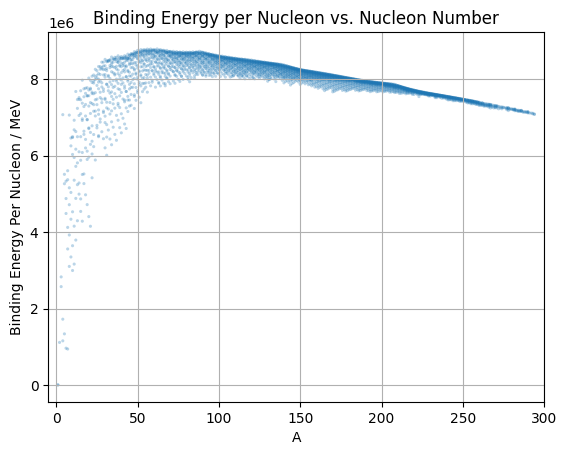

In [ ]:
plt.scatter(isotopes['A'], isotopes['bindingMeV'], alpha=0.3, s=5, linewidths=0, edgecolors='none')  # makes a scatter plot
#alpha value is the opacity of each point.
#s value is point size
#linewidths is set to 0 so the effective point size matches the s value
#edgecolors is set to 'none' so the point size matches the s value
plt.title("Binding Energy per Nucleon vs. Nucleon Number")
plt.xlabel("A")
plt.ylabel("Binding Energy Per Nucleon / MeV")
plt.grid(True)
plt.xlim(-5,300) #x-axis bounds
plt.plot;

#Why is 1e6 displayed in top left?  Troubleshoot.

#Try another plot

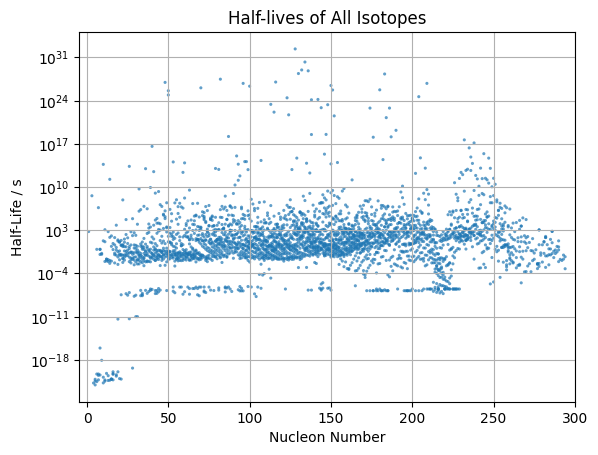

In [ ]:
plt.scatter(isotopes['A'], isotopes['half_life_sec'], alpha=0.7, s=5, linewidths=0, edgecolors='none')  # makes a scatter plot
#alpha value is the opacity of each point.
#s value is point size
#linewidths is set to 0 so the effective point size matches the s value
#edgecolors is set to 'none' so the point size matches the s value
plt.title("Half-lives of All Isotopes")
plt.xlabel("Nucleon Number")
plt.ylabel("Half-Life / s")
plt.grid(True)
plt.xlim(-5,300)
plt.yscale('log')
plt.plot;